https://moviecultists.com/do-you-need-to-normalize-variables-for-logistic-regression

https://www.quora.com/How-does-feature-scaling-affect-logistic-regression-model

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn
import seaborn as sns

In [2]:
heart = pd.read_csv("SAheart.data")
heart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [3]:
heart.famhist.replace(to_replace=['Present', 'Absent'], value=[1, 0], inplace=True)
heart.drop(['row.names'], axis=1, inplace=True)
heart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [4]:
Xa = heart[['age','ldl']]
Xa

,age,ldl
0,52,5.73
1,63,4.41
2,46,3.48
3,58,6.41
4,49,3.50
...,...,...
457,58,5.98
458,52,4.41
459,55,1.59
460,40,11.61


In [5]:
ya = heart.chd
ya

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.33, random_state=42)

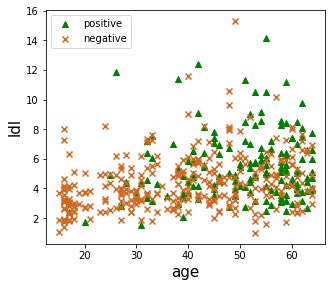

In [92]:
fig, ax = plt.subplots()
ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logrega = LogisticRegression(solver='lbfgs', max_iter=1000)

In [10]:
logrega.fit(Xa_train, ya_train)
ya_pred = logrega.predict(Xa_test)

In [11]:
ya_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
      dtype=int64)

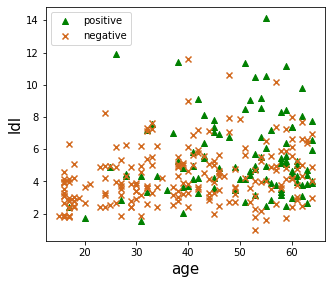

In [91]:
fig, ax = plt.subplots()
ax.scatter(Xa_train[ya_train==1]["age"],Xa_train[ya_train==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_train[ya_train==0]["age"],Xa_train[ya_train==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

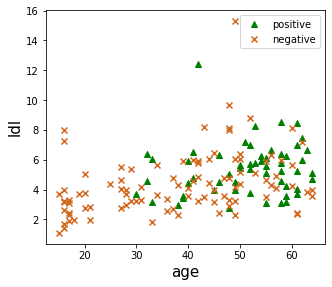

In [90]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_test==1]["age"],Xa_test[ya_test==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_test==0]["age"],Xa_test[ya_test==0]["ldl"],marker='x',label='negative', color='chocolate')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

In [14]:
logrega.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 2,
 'classes_': array([0, 1], dtype=int64),
 'n_iter_': array([22]),
 'coef_': array([[0.05234073, 0.21692807]]),
 'intercept_': array([-4.09112497])}

In [15]:
_xa = np.linspace(14.0, 65.0, num=41)
_xa

array([14.   , 15.275, 16.55 , 17.825, 19.1  , 20.375, 21.65 , 22.925,
       24.2  , 25.475, 26.75 , 28.025, 29.3  , 30.575, 31.85 , 33.125,
       34.4  , 35.675, 36.95 , 38.225, 39.5  , 40.775, 42.05 , 43.325,
       44.6  , 45.875, 47.15 , 48.425, 49.7  , 50.975, 52.25 , 53.525,
       54.8  , 56.075, 57.35 , 58.625, 59.9  , 61.175, 62.45 , 63.725,
       65.   ])

In [16]:
_ya = (logrega.__dict__['intercept_'] * (-1.0) - logrega.__dict__['coef_'][0][0] * _xa ) \
    / logrega.__dict__['coef_'][0][1]

In [17]:
_ya

array([15.48142088, 15.17378693, 14.86615299, 14.55851904, 14.2508851 ,
       13.94325115, 13.63561721, 13.32798326, 13.02034932, 12.71271537,
       12.40508143, 12.09744748, 11.78981354, 11.48217959, 11.17454565,
       10.8669117 , 10.55927776, 10.25164381,  9.94400987,  9.63637592,
        9.32874198,  9.02110803,  8.71347409,  8.40584014,  8.0982062 ,
        7.79057225,  7.48293831,  7.17530436,  6.86767042,  6.56003647,
        6.25240253,  5.94476858,  5.63713464,  5.32950069,  5.02186675,
        4.71423281,  4.40659886,  4.09896492,  3.79133097,  3.48369703,
        3.17606308])

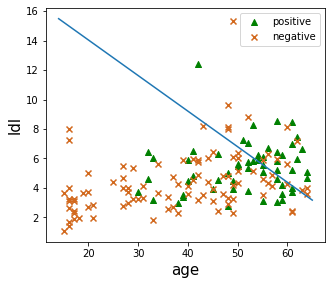

In [89]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_test==1]["age"],Xa_test[ya_test==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_test==0]["age"],Xa_test[ya_test==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

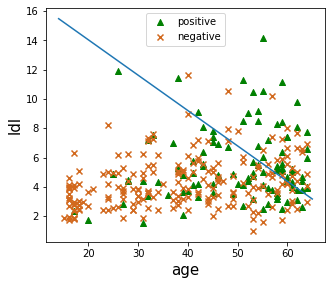

In [88]:
fig, ax = plt.subplots()
ax.scatter(Xa_train[ya_train==1]["age"],Xa_train[ya_train==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_train[ya_train==0]["age"],Xa_train[ya_train==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

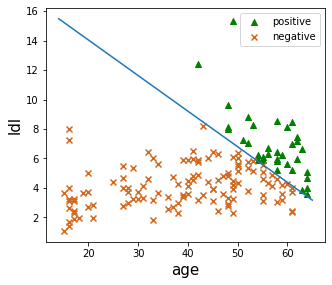

In [87]:
fig, ax = plt.subplots()
ax.scatter(Xa_test[ya_pred==1]["age"],Xa_test[ya_pred==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(Xa_test[ya_pred==0]["age"],Xa_test[ya_pred==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

In [21]:
perfa = sklearn.metrics.confusion_matrix(ya_test, ya_pred)
print(perfa)
err_logrega = np.mean(ya_test != ya_pred)
print(err_logrega)
print(1 - sum(np.diag(perfa)) / float(len(ya_test)))
assert(np.round(err_logrega, 5) == 
       np.round(1 - sum(np.diag(perfa)) / float(len(ya_test)), 5))

[[83 14]
 [35 21]]
0.3202614379084967
0.3202614379084967


https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [22]:
from sklearn import preprocessing

In [23]:
Xb = heart[['age','ldl']]
Xb

,age,ldl
0,52,5.73
1,63,4.41
2,46,3.48
3,58,6.41
4,49,3.50
...,...,...
457,58,5.98
458,52,4.41
459,55,1.59
460,40,11.61


In [24]:
yb = heart.iloc[:, -1]
yb

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

In [25]:
scaler = preprocessing.StandardScaler().fit(Xb)

In [26]:
Xb_scaled = scaler.transform(Xb)

In [27]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 2,
 'n_samples_seen_': 462,
 'mean_': array([42.81601732,  4.74032468]),
 'var_': array([212.95965687,   4.27938193]),
 'scale_': array([14.59313732,  2.0686667 ])}

In [28]:
Xb_scaled

array([[ 6.29335727e-01,  4.78412169e-01],
       [ 1.38311470e+00, -1.59679988e-01],
       [ 2.18183562e-01, -6.09244918e-01],
       [ 1.04048789e+00,  8.07126311e-01],
       [ 4.23759645e-01, -5.99576855e-01],
       [ 1.49658201e-01,  8.36130500e-01],
       [-3.30019324e-01, -6.57585233e-01],
       [ 1.04048789e+00, -7.26674215e-02],
       [-9.46747571e-01, -4.40053815e-01],
       [ 6.97861088e-01,  5.12250390e-01],
       [ 1.17753861e+00, -8.65448587e-01],
       [-1.92968603e-01, -1.45177894e-01],
       [-1.76905190e+00, -1.38268996e+00],
       [-1.90610262e+00, -1.38752399e+00],
       [ 6.97861088e-01, -1.18449467e+00],
       [ 2.18183562e-01, -1.11198419e+00],
       [ 4.23759645e-01,  5.11908241e+00],
       [ 6.97861088e-01,  1.71592423e+00],
       [ 1.31458933e+00,  1.31469962e+00],
       [ 1.10901325e+00,  7.20113744e-01],
       [-1.56347582e+00, -1.45036640e+00],
       [ 8.11328406e-02, -9.13788902e-01],
       [ 4.92285005e-01,  7.92624216e-01],
       [ 1.

In [29]:
Xb_scaled.mean(axis=0)

array([-9.61232056e-18,  3.42198612e-16])

In [30]:
Xb_scaled.std(axis=0)

array([1., 1.])

In [31]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb_scaled, yb, test_size=0.33, random_state=42)
logregb = LogisticRegression(solver='lbfgs', max_iter=1000)
logregb.fit(Xb_train, yb_train)
yb_pred = logregb.predict(Xb_test)
print(yb_pred)
print(logregb.__dict__)
perfb = sklearn.metrics.confusion_matrix(yb_test, yb_pred)
print(perfb)
err_logregb = np.mean(yb_test != yb_pred)
print(err_logregb)
print(1 - sum(np.diag(perfb)) / float(len(yb_test)))
assert(np.round(err_logregb, 5) == 
       np.round(1 - sum(np.diag(perfb)) / float(len(yb_test)), 5))

[0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 0 1]
{'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 1.0, 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'random_state': None, 'solver': 'lbfgs', 'max_iter': 1000, 'multi_class': 'auto', 'verbose': 0, 'warm_start': False, 'n_jobs': None, 'l1_ratio': None, 'n_features_in_': 2, 'classes_': array([0, 1], dtype=int64), 'n_iter_': array([6]), 'coef_': array([[0.74748756, 0.44447108]]), 'intercept_': array([-0.81664493])}
[[83 14]
 [35 21]]
0.3202614379084967
0.3202614379084967


In [32]:
coefa = logrega.__dict__['coef_'][0]
coefb = logregb.__dict__['coef_'][0]
print(coefa)
print(coefb)

[0.05234073 0.21692807]
[0.74748756 0.44447108]


In [33]:
_xb = np.linspace(-1.8, 1.8, num=10)
_yb = (logregb.__dict__['intercept_'] * (-1.0) - logregb.__dict__['coef_'][0][0] * _xb ) \
    / logregb.__dict__['coef_'][0][1]
print(_xb)
print(_yb)

[-1.8 -1.4 -1.  -0.6 -0.2  0.2  0.6  1.   1.4  1.8]
[ 4.86448418  4.19178569  3.5190872   2.84638872  2.17369023  1.50099174
  0.82829325  0.15559476 -0.51710373 -1.18980221]


In [34]:
points = np.array([_xb, _yb]).T
points

array([[-1.8       ,  4.86448418],
       [-1.4       ,  4.19178569],
       [-1.        ,  3.5190872 ],
       [-0.6       ,  2.84638872],
       [-0.2       ,  2.17369023],
       [ 0.2       ,  1.50099174],
       [ 0.6       ,  0.82829325],
       [ 1.        ,  0.15559476],
       [ 1.4       , -0.51710373],
       [ 1.8       , -1.18980221]])

In [35]:
points_scaled_back = scaler.inverse_transform(points)
points_scaled_back

array([[16.54837014, 14.80332113],
       [22.38562507, 13.41173216],
       [28.22288   , 12.0201432 ],
       [34.06013492, 10.62855424],
       [39.89738985,  9.23696527],
       [45.73464478,  7.84537631],
       [51.57189971,  6.45378734],
       [57.40915464,  5.06219838],
       [63.24640957,  3.67060942],
       [69.08366449,  2.27902045]])

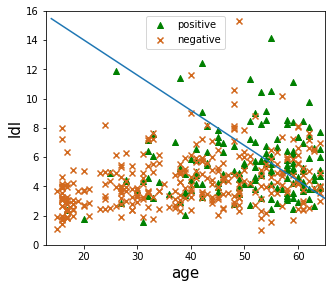

In [86]:
fig, ax = plt.subplots()
ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.xlim([13, 65])
plt.ylim([0, 16])
plt.plot(_xa, _ya)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

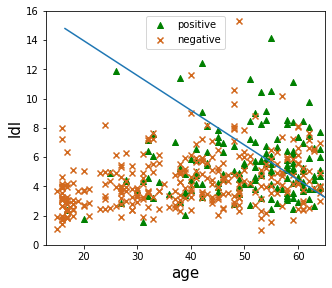

In [85]:
fig, ax = plt.subplots()
ax.scatter(heart[heart["chd"]==1]["age"],heart[heart["chd"]==1]["ldl"],marker='^',label='positive', color='green')
ax.scatter(heart[heart["chd"]==0]["age"],heart[heart["chd"]==0]["ldl"],marker='x',label='negative', color='chocolate')
plt.xlim([13, 65])
plt.ylim([0, 16])
plt.plot(points_scaled_back[:, 0], points_scaled_back[:, 1])
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('ldl', fontsize=15)
ax.legend()
fig.set_size_inches(5, 4.3)

TODO: Plot Figure 5 in the paper.

In [38]:
beta = [0.5974239, 0.3825687]
beta_0 = -0.7394441
alpha = -0.36972204

In [39]:
# Definition of the weights of evidence w_j = beta_j*phi(x)+alpha_j, refer to Equ.16 in paper NNBelief
def trained_weight(A,b,X):  
    weights= np.empty((len(X.index), len(A)))
    for i in range(len(A)):
        weights[:,[i]]= np.array([X[i]*A[i]+b]).T
    return weights 

# Calculate positive & negative weights of evidence (w^+,w^-，参见Equ.16下面那段描述)
def weight_of_evidence(weight):
    W=[]
    if isinstance(weight[0],list):
        for i in range(len(weight)):
            W.append((max(0,weight[i][0]),max(0,-weight[i][0])))
    else:
        for i in range(len(weight)):
            W.append((max(0,weight[i]),max(0,-weight[i])))        
    return W

# Calculate the sum of positive & negative weights (参见Equ.17下面一行公式)
def sum_weight(W):
    weight_pos_temp = np.empty((W.shape[0], W.shape[1]))
    weight_neg_temp = np.empty((W.shape[0], W.shape[1]))
    weight_pos = np.empty((W.shape[0], 1))
    weight_neg = np.empty((W.shape[0], 1))
    for i in range(W.shape[1]):
        weight_pos_temp[:,[i]]=np.array(weight_of_evidence(W[:,[i]]))[:,[0]]
        weight_neg_temp[:,[i]]=np.array(weight_of_evidence(W[:,[i]]))[:,[1]]
    weight_pos=np.sum(weight_pos_temp,axis=1)
    weight_neg=np.sum(weight_neg_temp,axis=1)
    return(weight_pos,weight_neg)


# Calculate conflict from trained parameters and feature values
def conflict(A,b,X):
    w_j=trained_weight(A,b,X)   
    weight_pos,weight_neg=sum_weight(w_j)
    k=degree_of_conflict(weight_pos,weight_neg)
    return k


## Figure 2.

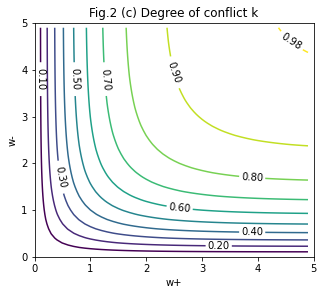

In [84]:
# Definition of the degree of conflict k=[1-exp(-w^+)]*[1-exp(-w^-)] (Equ.21c)
def degree_of_conflict(W_pos, W_neg):
    ka = (1 - np.exp(-1  * W_pos)) * (1 - np.exp(-1 * W_neg))
    return ka

feature_x = np.arange(0, 5, 0.1)
feature_y = np.arange(0, 5, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
Z = degree_of_conflict(grid_X, grid_Y)
ct = ax.contour(grid_X, grid_Y, Z, list(np.arange(0.1, 1, 0.1)) + [0.98])
ax.clabel(ct, colors = 'k', fmt = '%2.2f', fontsize=10)
ax.set_title('Fig.2 (c) Degree of conflict k')
ax.set_xlabel('w+')
ax.set_ylabel('w-')
plt.xlim([0, 5])
plt.ylim([0, 5])
fig.set_size_inches(5, 4.3)
  
plt.show()

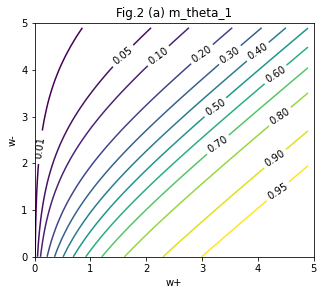

In [205]:
# (Equ.20a)
def mass_function_for_class_one(W_pos, W_neg):
    ka = (1 - np.exp(-1 * W_pos)) * (1 - np.exp(-1 * W_neg))
    m_theta_one = (1 - np.exp(-1 * W_pos)) * np.exp(-1 * W_neg) / (1 - ka)
    return m_theta_one

feature_x = np.arange(0, 5, 0.1)
feature_y = np.arange(0, 5, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
Z = mass_function_for_class_one(grid_X, grid_Y)
ct = ax.contour(grid_X, 
    grid_Y, Z, [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
ax.clabel(ct, colors = 'k', fmt = '%2.2f', fontsize=10)
ax.set_title('Fig.2 (a) m_theta_1')
ax.set_xlabel('w+')
ax.set_ylabel('w-')
plt.xlim([0, 5])
plt.ylim([0, 5])
fig.set_size_inches(5, 4.3)
  
plt.show()

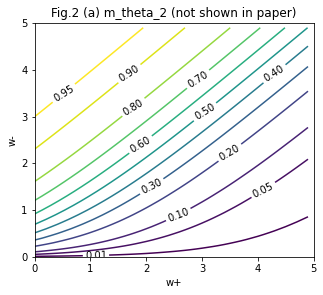

In [172]:
# (Equ.20a)
def mass_function_for_class_two(W_pos, W_neg):
    ka = (1 - np.exp(-1 * W_pos)) * (1 - np.exp(-1 * W_neg))
    m_theta_two = (1 - np.exp(-1 * W_neg)) * np.exp(-1 * W_pos) / (1 - ka)
    return m_theta_two

feature_x = np.arange(0, 5, 0.1)
feature_y = np.arange(0, 5, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
Z = mass_function_for_class_two(grid_X, grid_Y)
ct = ax.contour(grid_X, 
    grid_Y, Z, [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
ax.clabel(ct, colors = 'k', fmt = '%2.2f', fontsize=10)
ax.set_title('Fig.2 (a) m_theta_2 (not shown in paper)')
ax.set_xlabel('w+')
ax.set_ylabel('w-')
fig.set_size_inches(5, 4.3)
plt.xlim([0, 5])
plt.ylim([0, 5])
  
plt.show()

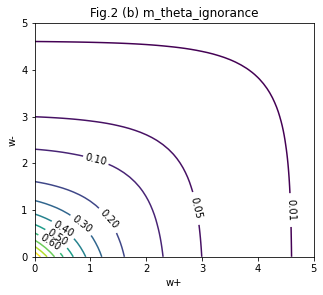

In [171]:
# (Equ.20a)
def mass_function_for_class_ignorance(W_pos, W_neg):
    ka = (1 - np.exp(-1 * W_pos)) * (1 - np.exp(-1 * W_neg))
    m_theta_one = np.exp(-1 * W_pos - W_neg) / (1 - ka)
    return m_theta_one

feature_x = np.arange(0, 5, 0.1)
feature_y = np.arange(0, 5, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
Z = mass_function_for_class_ignorance(grid_X, grid_Y)
ct = ax.contour(grid_X, 
    grid_Y, Z, [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.clabel(ct, colors = 'k', fmt = '%2.2f', fontsize=10)
ax.set_title('Fig.2 (b) m_theta_ignorance')
ax.set_xlabel('w+')
ax.set_ylabel('w-')
fig.set_size_inches(5, 4.3)
plt.xlim([0, 5])
plt.ylim([0, 5])
  
plt.show()

## Figure 6.

Left:  y = 2.2/(50 - 13) * (x - 50)

Right: y = 1.13 / (6.87 - 1) * (x - 6.87)

Big question here: 
- Why 2.2? Why 1.13?
- Why 2? Why 1.5?

In [144]:
import random
arr_age_pos = heart[heart["chd"]==1]["age"]
arr_age_neg = heart[heart["chd"]==0]["age"]
weight_pos = np.array([-2.0 + (random.random() - 0.5 ) * 0.5 
                       for _ in arr_age_pos])
weight_neg = np.array([2.0 + (random.random() - 0.5 ) * 0.5 
                       for _ in arr_age_neg])

Text(0.5, 1.0, 'Fig.6 Left')

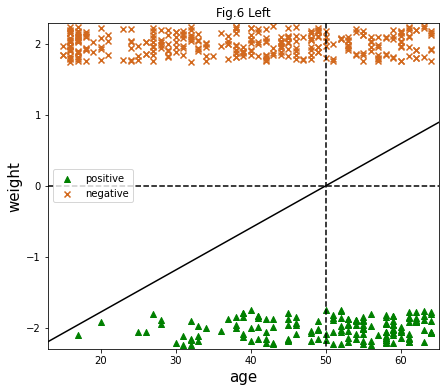

In [145]:
fig, ax = plt.subplots()
ax.scatter(arr_age_pos, weight_pos, marker='^', label='positive', color='green')
ax.scatter(arr_age_neg, weight_neg, marker='x', label='negative', color='chocolate')
_ylim = 2.3
plt.xlim([13, 65])
plt.ylim([-_ylim, _ylim])
plt.plot([13, 65], [0, 0], linestyle='dashed', color='black')
plt.plot([50, 50], [_ylim, -_ylim], linestyle='dashed', color='black')
plt.plot([13, 65], [-2.2, 0.89189189], color='black')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('weight', fontsize=15)
ax.legend()
fig.set_size_inches(7, 6)
ax.set_title('Fig.6 Left')

In [176]:
import random
arr_ldl_pos = heart[heart["chd"]==1]["ldl"]
arr_ldl_neg = heart[heart["chd"]==0]["ldl"]
weight_pos = np.array([-1.5 + (random.random() - 0.5 ) * 0.5 
                       for _ in arr_ldl_pos])
weight_neg = np.array([1.5 + (random.random() - 0.5 ) * 0.5 
                       for _ in arr_ldl_neg])

Text(0.5, 1.0, 'Fig.6 Right')

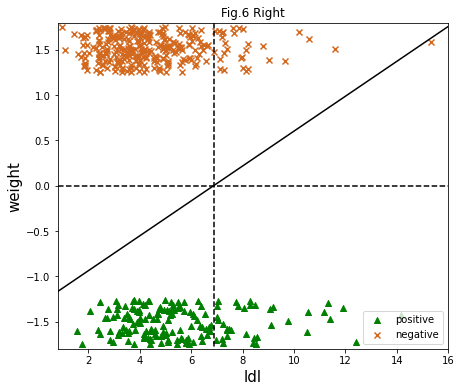

In [179]:
fig, ax = plt.subplots()
ax.scatter(arr_ldl_pos, weight_pos, marker='^', label='positive', color='green')
ax.scatter(arr_ldl_neg, weight_neg, marker='x', label='negative', color='chocolate')
_ylim = 1.8
plt.xlim([0.8, 16])
plt.ylim([-_ylim, _ylim])
plt.plot([0.8, 16], [0, 0], linestyle='dashed', color='black')
plt.plot([6.87, 6.87], [_ylim, -_ylim], linestyle='dashed', color='black')
plt.plot([0.8, 16], [-1.1685, 1.75756388], color='black')
ax.set_xlabel('ldl', fontsize=15)
ax.set_ylabel('weight', fontsize=15)
ax.legend()
fig.set_size_inches(7, 6)
ax.set_title('Fig.6 Right')

## Figure 7.

In [180]:
# equation (20a)
def mass_function_for_class_one(omega_pos, omega_neg):
    ka = (1 - np.exp(-1 * omega_pos)) * (1 - np.exp(-1 * omega_neg))
    mass_theta_one = (1 - np.exp(-1 * omega_pos)) * np.exp(-1 * omega_neg) / (1 - ka)
    return mass_theta_one

# equation (20b)
def mass_function_for_class_two(omega_pos, omega_neg):
    ka = (1 - np.exp(-1 * omega_pos)) * (1 - np.exp(-1 * omega_neg))
    mass_theta_two = (1 - np.exp(-1 * omega_neg)) * np.exp(-1 * omega_pos) / (1 - ka)
    return mass_theta_two

# equation (20c)
def mass_function_for_class_ignorance(omega_pos, omega_neg):
    ka = (1 - np.exp(-1 * omega_pos)) * (1 - np.exp(-1 * omega_neg))
    mass_theta_ignorance = np.exp((-1) * omega_pos - omega_neg) / (1 - ka)
    return mass_theta_ignorance

Text(0.5, 1.0, 'Fig.7 Left')

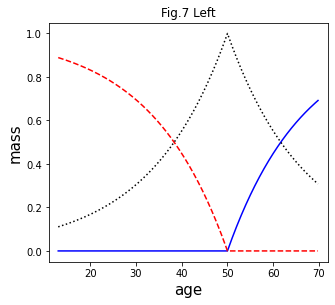

In [199]:
def omega_pos_age(_age):
    omega = 2.2/(50 - 13) * (_age - 50)
    if omega <= 0:
        omega = 0
    return omega

def omega_neg_age(_age):
    omega = 2.2/(50 - 13) * (_age - 50)
    if omega >= 0:
        omega = 0
    else:
        omega *= -1
    return omega

arr_age = np.arange(13, 70, 0.2)
arr_omega_pos_age = np.array(list(map(omega_pos_age, arr_age)))
arr_omega_neg_age = np.array(list(map(omega_neg_age, arr_age)))

mass_theta_one = mass_function_for_class_one(arr_omega_pos_age, arr_omega_neg_age)
mass_theta_two = mass_function_for_class_two(arr_omega_pos_age, arr_omega_neg_age)
mass_theta_ignorance = mass_function_for_class_ignorance(arr_omega_pos_age, arr_omega_neg_age)

fig, ax = plt.subplots()
plt.xlim([11, 72])
plt.ylim([-0.05, 1.05])
plt.plot(arr_age, mass_theta_one, linestyle='-', color='blue')
plt.plot(arr_age, mass_theta_two, linestyle='--', color='red')
plt.plot(arr_age, mass_theta_ignorance, linestyle=':', color='black')
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('mass', fontsize=15)
fig.set_size_inches(5, 4.4)
ax.set_title('Fig.7 Left')

Text(0.5, 1.0, 'Fig.7 Right')

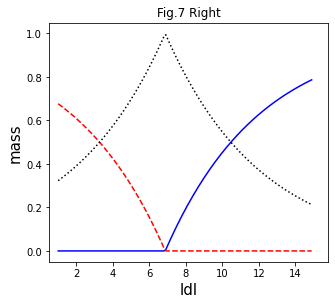

In [200]:
def omega_pos_ldl(_ldl):
    omega =  1.13 / (6.87 - 1) * (_ldl - 6.87)
    if omega <= 0:
        omega = 0
    return omega

def omega_neg_ldl(_ldl):
    omega = 1.13 / (6.87 - 1) * (_ldl - 6.87)
    if omega >= 0:
        omega = 0
    else:
        omega *= -1
    return omega

arr_ldl = np.arange(1, 15, 0.1)
arr_omega_pos_ldl = np.array(list(map(omega_pos_ldl, arr_ldl)))
arr_omega_neg_ldl = np.array(list(map(omega_neg_ldl, arr_ldl)))

mass_theta_one = mass_function_for_class_one(arr_omega_pos_ldl, arr_omega_neg_ldl)
mass_theta_two = mass_function_for_class_two(arr_omega_pos_ldl, arr_omega_neg_ldl)
mass_theta_ignorance = mass_function_for_class_ignorance(arr_omega_pos_ldl, arr_omega_neg_ldl)

fig, ax = plt.subplots()
plt.xlim([0.5, 15.8])
plt.ylim([-0.05, 1.05])
plt.plot(arr_ldl, mass_theta_one, linestyle='-', color='blue')
plt.plot(arr_ldl, mass_theta_two, linestyle='--', color='red')
plt.plot(arr_ldl, mass_theta_ignorance, linestyle=':', color='black')
ax.set_xlabel('ldl', fontsize=15)
ax.set_ylabel('mass', fontsize=15)
fig.set_size_inches(5, 4.4)
ax.set_title('Fig.7 Right')

## Figure 8 (a)

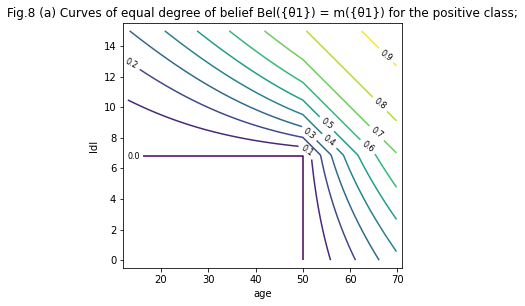

In [229]:
arr_ldl = np.arange(0, 15.1, 0.1)
arr_omega_pos_ldl = np.array(list(map(omega_pos_ldl, arr_ldl)))
arr_omega_neg_ldl = np.array(list(map(omega_neg_ldl, arr_ldl)))

arr_age = np.arange(13, 70, 0.2)
arr_omega_pos_age = np.array(list(map(omega_pos_age, arr_age)))
arr_omega_neg_age = np.array(list(map(omega_neg_age, arr_age)))

# The line below Equation (17c) 
Z_pos = np.matrix([list(arr_omega_pos_age + x) \
        for x in arr_omega_pos_ldl])
Z_neg = np.matrix([list(arr_omega_neg_age + x) \
        for x in arr_omega_neg_ldl])

# Equation (20a)
def mass_function_for_class_one(omega_pos, omega_neg):
    ka = (1 - np.exp(-1 * omega_pos)) * (1 - np.exp(-1 * omega_neg))
    mass_theta_one = (1 - np.exp(-1 * omega_pos)) * np.exp(-1 * omega_neg) / (1 - ka)
    return mass_theta_one

# https://stackoverflow.com/questions/61899911
F_vectorized = np.vectorize(mass_function_for_class_one)
mass_combined = F_vectorized(Z_pos, Z_neg)
Z = mass_combined
    
fig, ax = plt.subplots()
ct = ax.contour(arr_age, arr_ldl, Z, np.arange(0.0, 1.0, 0.1))
ax.clabel(ct, colors = 'k', fmt = '%2.1f', fontsize=8)
ax.set_title('Fig.8 (a) Curves of equal degree of belief Bel({θ1}) = m({θ1}) for the positive class;')
ax.set_xlabel('age')
ax.set_ylabel('ldl')
fig.set_size_inches(5, 4.5)
plt.xlim([12, 71])
plt.ylim([-0.5, 15.5])
plt.show()